# Aufgabe 13

## Simulationskette für Neutrinodetektor

### a) Signal MC

Fluss des Neutrinos:
$$ \Phi = \Phi_0 \cdot \left(\frac{E}{\mathrm{TeV}} \right)^{-\gamma} $$

$$ \tiny{\gamma = 2,7 \:,\: E_\text{unten} = 1 \mathrm{TeV} \:,\: E_\text{oben} = \infty} $$ 

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
gamma = 2.7
phi_0 = 1.7

def phi(x):
    return phi_0 * x**(-gamma)

def Phi(x):
    return phi_0/(gamma-1) * (1-x**(-(gamma-1)))

def Phi_inv(x):
    return 1/(1-x)**(1/(gamma-1))

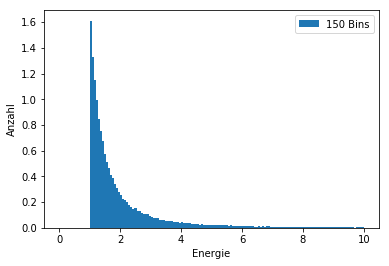

In [12]:
np.random.seed(10)
r = np.random.uniform(0,1, 100000)

energy = Phi_inv(r)
plt.hist(energy, bins=150,range=[0, 10], density=True,  label='150 Bins')
plt.xlabel('Energie')
plt.ylabel('Anzahl')
plt.legend()
dfEnergy = pd.DataFrame({'Energy': energy})

### b) Akzeptanz

Die Wahrscheinlichkeit, ein Ereignis zu detektieren beträgt:
$$ P(E) = \left(1-e^{-E/2} \right)^3 $$

In [4]:
def P(x):
    return (1-np.exp(-x/2))**3

np.random.seed(42)
xx = np.random.uniform(0,1, 100000)

acceptance = xx < P(energy)
detected = energy[acceptance == True]

dfAcceptance = pd.DataFrame({'AcceptanceMask': acceptance})

dfab = pd.concat([dfEnergy, dfAcceptance], axis=1)

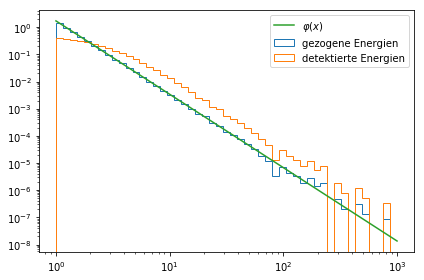

In [5]:
x = np.linspace(1, 1000, 10000)

plt.hist(energy, density=True, bins=np.logspace(0,3), histtype='step', label='gezogene Energien')
plt.hist(detected, density=True, bins=np.logspace(0,3), histtype='step', label='detektierte Energien')
plt.plot(x, phi(x), label=r'$\varphi(x)$')

plt.xscale('log')
plt.yscale('log')

plt.legend()
plt.tight_layout()

### c) Energiemessung

In [6]:
np.random.seed(42)
def polar(size, Energy):
    E=[]
    while len(E)<size:
        u1=np.random.uniform(0,1)
        u2=np.random.uniform(0,1)
        v1=2*u1-1
        v2=2*u2-1
        s=v1**2+v2**2
        if s <= 1:
            x1 = v1*np.sqrt(-2/s*np.log(s))
            x2 = v2*np.sqrt(-2/s*np.log(s))
            p1 = np.round(np.sqrt(2*Energy[len(E)-1])*x1+10*Energy[len(E)-1])
            p2 = np.round(np.sqrt(2*Energy[len(E)-1])*x2+10*Energy[len(E)-1])
        
        if p1>0:
            E.append(p1)
        
    return E

Hits=polar(10**5, energy)

dfHits = pd.DataFrame({'NumberOfHits' :Hits})
dfabc = pd.concat([dfab,dfHits], axis=1)

dfabc
#a, b= polar(20000,10,2)
#print(np.mean(a), np.var(a))
#print(np.mean(b), np.var(b))
#plt.hist(a, bins=20)
#plt.hist(b, bins=20)
#plt.show()

,Energy,AcceptanceMask,NumberOfHits
0,2.381910,False,11.0
1,1.012412,False,27.0
2,1.805221,False,10.0
3,2.253894,False,10.0
4,1.500772,False,24.0
5,1.161581,False,24.0
6,1.138644,True,12.0
7,2.318180,False,11.0
8,1.115135,False,19.0
9,1.055912,False,10.0


### d) Detektor

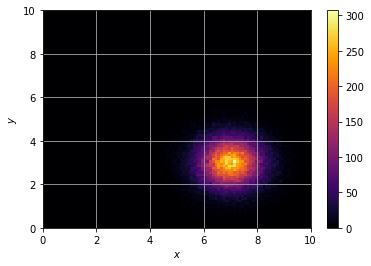

In [7]:
def detector(size, Hits):
    x=[]
    y=[]
    while len(x)<size:
        u1=np.random.uniform(0,1)
        u2=np.random.uniform(0,1)
        v1=2*u1-1
        v2=2*u2-1
        s=v1**2+v2**2
        if s <= 1:
            xx=v1*np.sqrt(-2/s*np.log(s))/(np.log10(Hits[len(x)-1]+1))+7
            yy=v2*np.sqrt(-2/s*np.log(s))/(np.log10(Hits[len(x)-1]+1))+3
            if 0 <= xx <= 10 and 0 <= yy <= 10:
                x.append(xx)
                y.append(yy)
                
    return x, y
       
xx, yy=detector(10**5, Hits)
plt.grid()
plt.hist2d(xx,yy, bins=[100,100], range=[[0,10],[0,10]], cmap='inferno')
plt.colorbar()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

In [10]:
dfx = pd.DataFrame({'x' :xx})
dfy = pd.DataFrame({'y' :yy})
dfabc = pd.concat([dfabc,dfx, dfy], axis=1)
dfabc

,Energy,AcceptanceMask,NumberOfHits,x,y
0,2.381910,False,11.0,5.356285,2.687580
1,1.012412,False,27.0,6.153183,2.887672
2,1.805221,False,10.0,6.395702,2.547355
3,2.253894,False,10.0,6.944990,3.970889
4,1.500772,False,24.0,7.046667,2.712924
5,1.161581,False,24.0,6.236875,2.619730
6,1.138644,True,12.0,6.074751,2.890880
7,2.318180,False,11.0,7.368553,3.370098
8,1.115135,False,19.0,5.909883,1.821769
9,1.055912,False,10.0,8.174874,2.593989


# TEST

In [ ]:
df = pd.DataFrame({'A': 'foo bar foo bar foo bar foo foo'.split(),
                   'B': 'one one two three two two one three'.split(),
                   'C': np.arange(8), 'D': np.arange(8) * 2})

df

In [ ]:
df.loc[df['B'] == 'two']

In [ ]:
test = pd.DataFrame({'month': [1, 4, 7, 10],
                     'year': [2012, 2014, 2013, 2014],
                     'sale':[55, 40, 84, 31]})

test2 = pd.DataFrame(['a', 'b', 'c', 'd'])
test3 = pd.DataFrame(['f', 'g', 'h', 'i'])

test23 = pd.concat([test2, test3], keys=['Energy', 'Acceptance'], axis=1)
testtest = test23.Acceptance == 'f'

#test23.append(testtest)
#pd.concat([test23, testtest], axis=1)

In [ ]:
def f(x):
    return 1/2*np.sin(x)

def F(x):
    return 1-np.cos(x)

def Finv(x):
    return np.arccos(1-2*x)

x = np.linspace(0,np.pi,100)
r = np.random.uniform(0,1,1000)

plt.plot(x,f(x))
#plt.plot(x,F(x))
plt.hist(Finv(r), bins='auto', density='True')

In [ ]:
x = 2+1

x

In [ ]:
def test(x):
    return x**2

y=np.linspace(0, 2)
energy=test(y)
acceptance = y < test(y)
testy = energy[acceptance == True]
plt.hist(testy)